# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
__author__ = 'Linda Jaber, CUSP NYU 2018'
from __future__ import print_function

import sys
import os
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
    
import pandas as pd

import matplotlib.pyplot as plot

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import scipy as sp
from scipy import optimize

%pylab inline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
PUIdata = os.getenv('PUIDATA')
if PUIdata is None:
    os.environ['PUIDATA']='%s/PUIdata'%os.getenv('HOME')
    PUIdata = os.getenv('PUIDATA')
print('PUIdata: ', PUIdata) 

PUIdata:  /nfshome/lj1232/PUIdata


### Downloading Data // Uncomment to run code

In [3]:
# firearms murders and ownership data

#!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
#%mkdir $PUIDATA/HW_9
#!mv 'World firearms murders and ownership - Sheet 1.csv' $PUIDATA/HW_9

In [4]:
# Number of mass shootings data

#url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
#urllib.urlretrieve(url, 'data-pvLFI.csv')
#!mv data-pvLFI.csv $PUIDATA/HW_9

In [5]:
# the world population by country data

#url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
#urllib.urlretrieve(url, 'file.gz')
#!unzip file.gz -d $PUIDATA/HW_9
#!mv file.gz $PUIDATA/HW_9

In [6]:
# the world gdp by country

#url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
#urllib.urlretrieve(url, 'file2.gz')
#!unzip file2.gz -d $PUIDATA/HW_9
#!mv file2.gz $PUIDATA/HW_9
!ls -ltr $PUIDATA/HW_9

total 704
-rw-rw---- 1 lj1232 lj1232    731 Oct 25 23:51 Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232  39350 Oct 25 23:51 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232    838 Oct 26 00:07 Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232  39350 Oct 26 00:07 Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232 243490 Oct 26 00:07 API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232    449 Nov 13 01:03 data-pvLFI.csv
-rw-rw---- 1 lj1232 lj1232  79717 Nov 13 01:04 file.gz
-rw-rw---- 1 lj1232 lj1232   7667 Nov 13 07:24 World firearms murders and ownership - Sheet 1.csv
-rw-rw---- 1 lj1232 lj1232 171866 Nov 13 07:25 API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232 116071 Nov 13 09:05 file2.gz


## Reading Data

In [7]:
df_ = pd.read_csv(PUIdata + '/HW_9/World firearms murders and ownership - Sheet 1.csv',\
                  usecols=['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm'])
df_.columns = ['Country Name', 'Number of homicides by firearm', 'Average total all civilian firearms',]
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [8]:
df_ms = pd.read_csv(PUIdata + '/HW_9/data-pvLFI.csv')
df_ms.columns = ['Country Name', 'Guns/100 inhabitants', 'Number of mass shootings']
df_ms.head()

,Country Name,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [9]:
# took year 2012 as it is the year mentioned for the Guardian data
df_pop = pd.read_csv(PUIdata + '/HW_9/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=[0], header=1, usecols=['Country Name', '2012'])
df_pop.columns = ['Country Name', 'pop']
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [10]:
df_gdp = pd.read_csv(PUIdata + '/HW_9/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=[0], header=1, usecols=['Country Name', '2012'])
df_gdp.columns = ['Country Name', 'gdp']
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [11]:
df = df_pop.merge(df_gdp, on='Country Name').merge(df_, on='Country Name').merge(df_ms, on='Country Name')
df.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,45.7,2


# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that:  
    a - sqrt(0) = 0  
    b - 1/0 = infinity  
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.  


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

### Optimizing by Numpy

In [12]:
# define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x**2)

# define a function for plotting data and model
def plot_data_with_model(x, y, ym, xlabel, ylabel, title):
    fig, ax = plt.subplots(dpi=100)
    ax.plot(x, y, linestyle=" ", marker="o", color="black", label="Measured")
    ax.plot(x, ym, linestyle="-", marker=None, color="red", label="Modeled")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc="best")
    plt.show()
    return fig, ax

# define a function to compute RSS value
def compute_rss(y, ym):
    rss = np.sum(np.square(ym - y))
    return rss

# define a function to compute RSS, build a model and plot
def comp_rss_and_plot_fit(x, y, a0, a1, xlabel, ylabel, title):
    ym = model(x, a0, a1)
    rss = compute_rss(y, ym)
    summary = 'Parameters a0 = {}, a1 = {}, yield RSS = {:0.2f}'.format(a0, a1, rss)
    fig = plot_data_with_model(x, y, ym, xlabel, ylabel, title)
    return fig, summary
    

In [13]:
# mass shootings per person
df['masspp'] = df['Number of mass shootings'] / df['pop']
df['masspp'].head()

0    1.758824e-07
1    1.186241e-07
2    1.797228e-07
3    1.151061e-07
4    2.500981e-07
Name: masspp, dtype: float64

In [14]:
# average total of all civillian firearms per person
df['fapp'] = df['Average total all civilian firearms'] / df['pop']
df['fapp'].head()

0    0.134110
1    0.296560
2    0.161751
3    0.286326
4    0.425167
Name: fapp, dtype: float64

In [15]:
# getting the order of the mean of the sample
df['masspp'].mean()

1.2356888832925394e-07

In [16]:
# dividing by the order of magnitude to insure unity
df['masspp'] = df['masspp'] * 1e7
df['masspp'].head()

0    1.758824
1    1.186241
2    1.797228
3    1.151061
4    2.500981
Name: masspp, dtype: float64

In [17]:
x = df['fapp']
y = df['masspp']

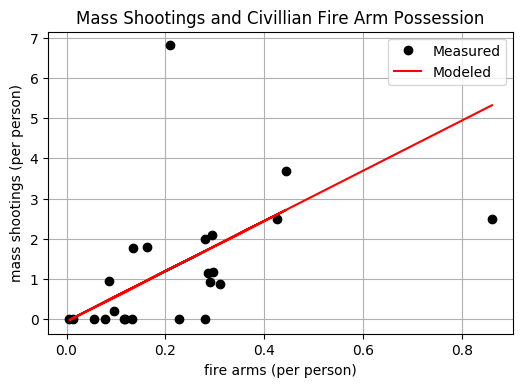

((<matplotlib.figure.Figure at 0x7f3f8ae43e80>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3fb86a10f0>),
 'Parameters a0 = -0.0534, a1 = 6.2489, yield RSS = 50.96')

In [18]:
comp_rss_and_plot_fit(x, y, -0.0534, 6.2489, xlabel='fire arms (per person)',\
                      ylabel='mass shootings (per person)',\
                      title='Mass Shootings and Civillian Fire Arm Possession')

### Optimizing by Scipy

In [19]:
def model_func(x, a0, a1):
    return a0 + a1*x

param_opt, param_cov = optimize.curve_fit(model_func, x, y)

print(param_opt)
print('\n')
print(param_cov)

[ 0.36839732  3.8373025 ]


[[ 0.24683415 -0.6681924 ]
 [-0.6681924   2.95639484]]


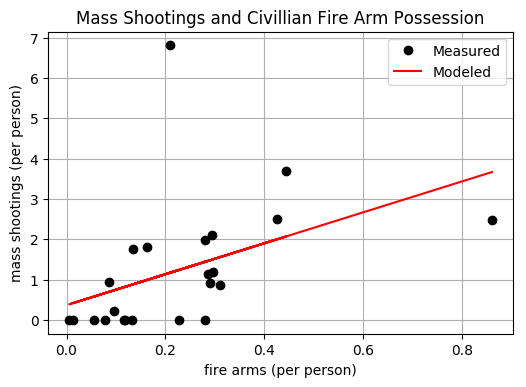

In [20]:
a0 = param_opt[0]
a1 = param_opt[1]

fig_scipy, rss = comp_rss_and_plot_fit(x, y, a0, a1, xlabel='fire arms (per person)',\
                      ylabel='mass shootings (per person)',\
                      title='Mass Shootings and Civillian Fire Arm Possession')

### Optimizing by Statsmodels

In [21]:
# using add_constant

X = sm.add_constant(df['fapp'])
sm_ols = smf.OLS(y, X).fit()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        23:30:23   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3684      0.497      0.742      0.467        -0.665     1.402
fapp           3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# using statsmodels.formula.api

ols_model_fit = ols(formula='y ~ x', data=df).fit()
ols_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        23:30:24   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3684      0.497      0.742      0.467        -0.665     1.402
x              3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Both ols statsmodels function give the same result

In [23]:
ols_model_fit.params

Intercept    0.368397
x            3.837303
dtype: float64

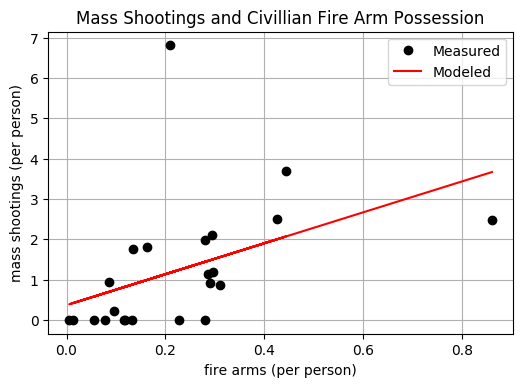

((<matplotlib.figure.Figure at 0x7f3f8921aa20>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3f8675b0f0>),
 'Parameters a0 = 0.36839728572040753, a1 = 3.8373025804348857, yield RSS = 46.28')

In [24]:
# plotting the ols fit

a0 = ols_model_fit.params['Intercept']
a1 = ols_model_fit.params['x']

comp_rss_and_plot_fit(x, y, a0, a1, xlabel='fire arms (per person)',\
                      ylabel='mass shootings (per person)',\
                      title='Mass Shootings and Civillian Fire Arm Possession')

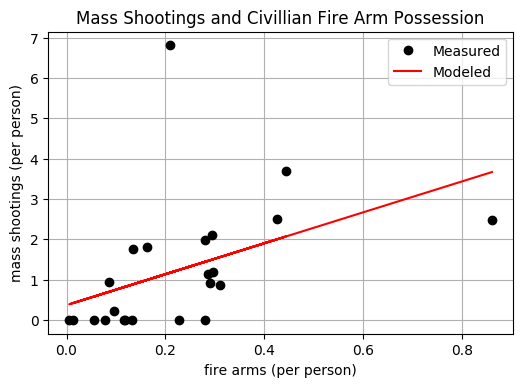

(<matplotlib.figure.Figure at 0x7f3f867623c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f8921afd0>)

In [25]:
# or calulating ym throught the predict()
# and using the plot_data_with_model function instead to plot

ym = ols_model_fit.predict(df)

plot_data_with_model(x, y, ym, xlabel='fire arms (per person)',\
                      ylabel='mass shootings (per person)',\
                      title='Mass Shootings and Civillian Fire Arm Possession')


In [26]:
# WLS

# errors show zero numbers. knowing that we cannot divide by 0 
# I took the minimum error above zero and assigned it instead of zeros 


min_error = np.sqrt(df['masspp'])[np.sqrt(df['masspp']) > 0].min()
df['mass_error'] = np.sqrt(df['masspp'])
df['mass_error'].replace(0, min_error, inplace=True)
df['mass_error']

0     1.326206
1     1.089147
2     1.340607
3     1.072875
4     1.581449
5     0.932935
6     0.462383
7     0.462383
8     1.922016
9     0.955930
10    0.462383
11    0.462383
12    0.462383
13    0.462383
14    0.462383
15    0.462383
16    0.462383
17    1.411594
18    2.608765
19    0.462383
20    0.975211
21    1.449475
22    1.576112
Name: mass_error, dtype: float64

In [27]:
sm_wls = smf.WLS(y, X, weights=list(1/df['mass_error'])).fit()
sm_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.293
Model:                            WLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     8.699
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00766
Time:                        23:30:24   Log-Likelihood:                -32.338
No. Observations:                  23   AIC:                             68.68
Df Residuals:                      21   BIC:                             70.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0940      0.306     -0.307      0.762        -0.730     0.543
fapp           3.9869      1.352      2.949      0.008         1.176     6.798
==============================================================================
Omnibus:                       15.781   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.892
Skew:                           1.433   Prob(JB):                     0.000130
Kurtosis:                       6.234   Cond. No.                         6.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


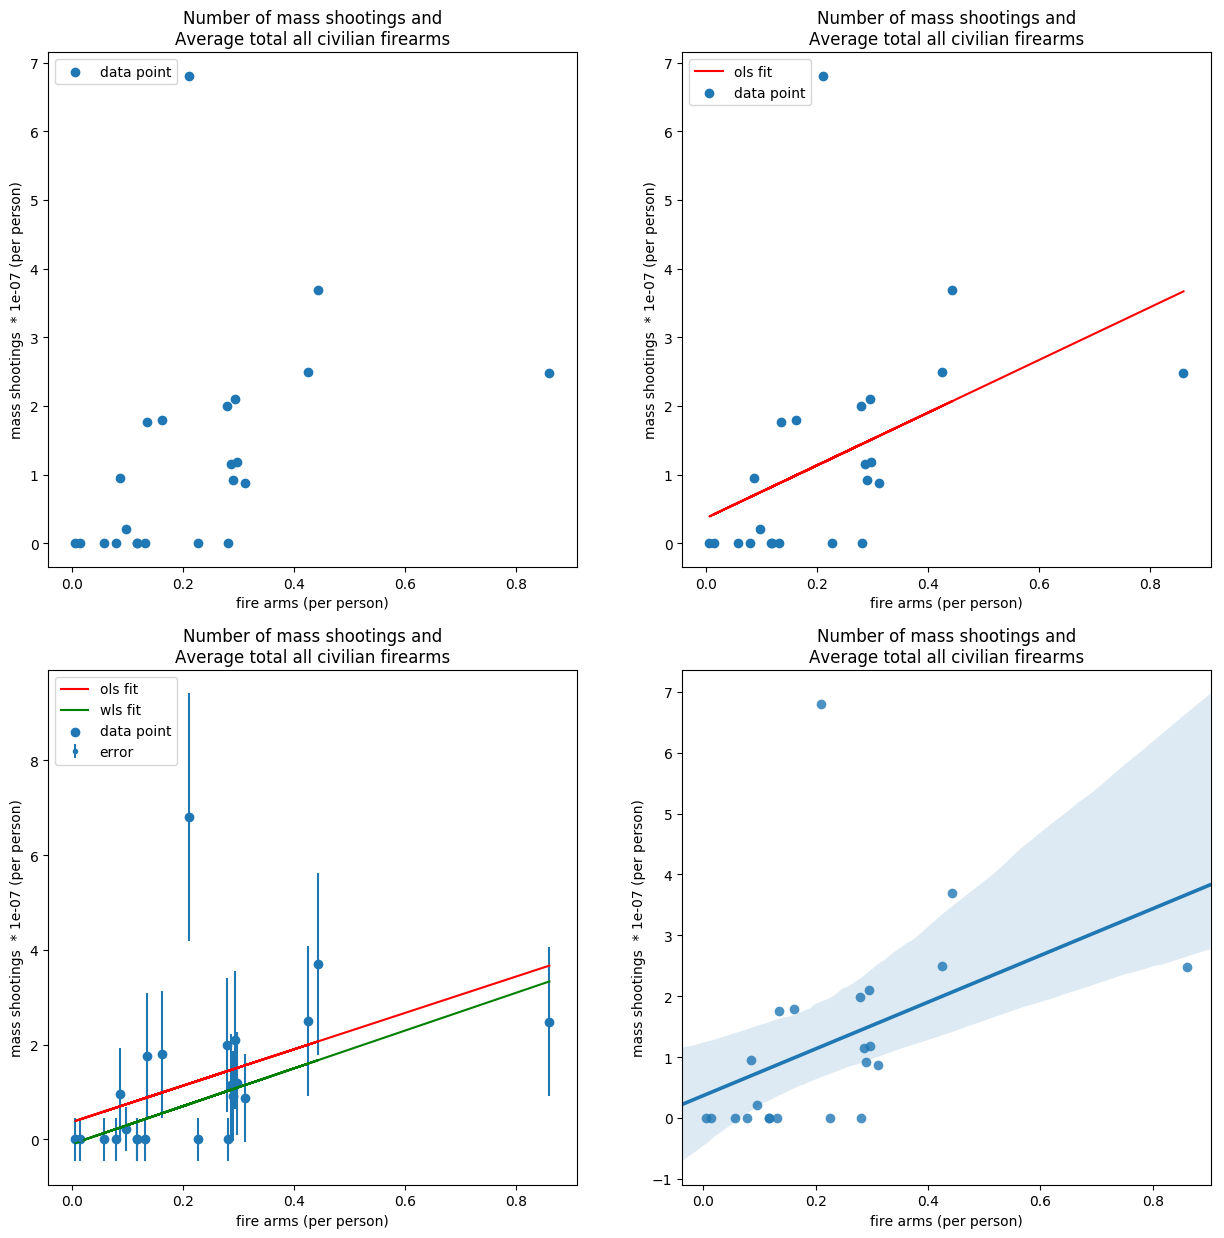

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15,15), dpi=100)

ax[0,0].scatter(df['fapp'], df['masspp'], label='data point')
ax[0,0].set_xlabel('fire arms (per person)')
ax[0,0].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[0,0].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[0,0].legend(loc=2)

ax[0,1].scatter(df['fapp'], df['masspp'], label='data point')
ax[0,1].plot(x, sm_ols.fittedvalues, 'r', label='ols fit')
ax[0,1].set_xlabel('fire arms (per person)')
ax[0,1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[0,1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[0,1].legend(loc=2)

ax[1,0].scatter(df['fapp'], df['masspp'], label='data point')
ax[1,0].errorbar(df['fapp'], df['masspp'], yerr=df['mass_error'], fmt='.', label='error')
ax[1,0].plot(x, sm_ols.fittedvalues, 'r', label='ols fit')
ax[1,0].plot(x, sm_wls.fittedvalues, 'g', label='wls fit')
ax[1,0].set_xlabel('fire arms (per person)')
ax[1,0].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1,0].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1,0].legend(loc=2)

import seaborn as sns  # i imported seaborn here at the end cause i don't want it to ruin my plots!

ax[1,1].sns_reg = sns.regplot(x, y, data=df)
ax[1,1].set_xlabel('fire arms (per person)')
ax[1,1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1,1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1,1].legend(loc=2)



**The plots above show the number of mass shootings per person in the observed countries plotted againt fire arm possession per person in 2012. Outliers were removed before starting the regression. From the exploratory analysis doen before it was clear that the US is an outlier so it was dropped. Then the data point were fitted using different models. We can observe a slightly different linear fits resulting from each model. The models show a positive linear relation, however the regression results show a low value of r-squared.**

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



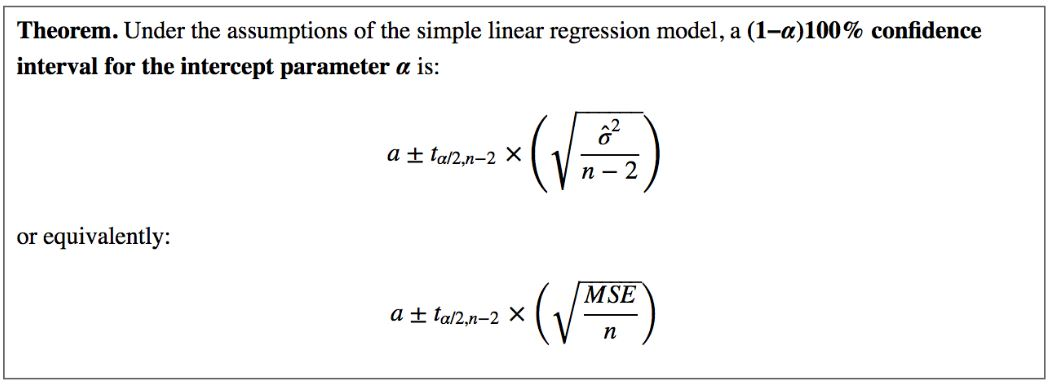

In [29]:
Image(filename='CI_.JPG')

In [30]:
#ci_95 = np.percentile(ym, [2.5, 97.5])
# for alpha=0.5
# Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom 


n = len(x)
tp = sp.stats.t.ppf(0.975, n-2)
sigma_hat= np.sqrt((np.sum(x - ym) ** 2) / n)
ci = tp * (np.sqrt(sigma_hat ** 2 / (n -2)))

print('t-statistic at (1-alpha/2) = {}\nConfidence Interval = +/-{}'.format(tp, ci))

t-statistic at (1-alpha/2) = 2.079613844727662
Confidence Interval = +/-2.19744332937188


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


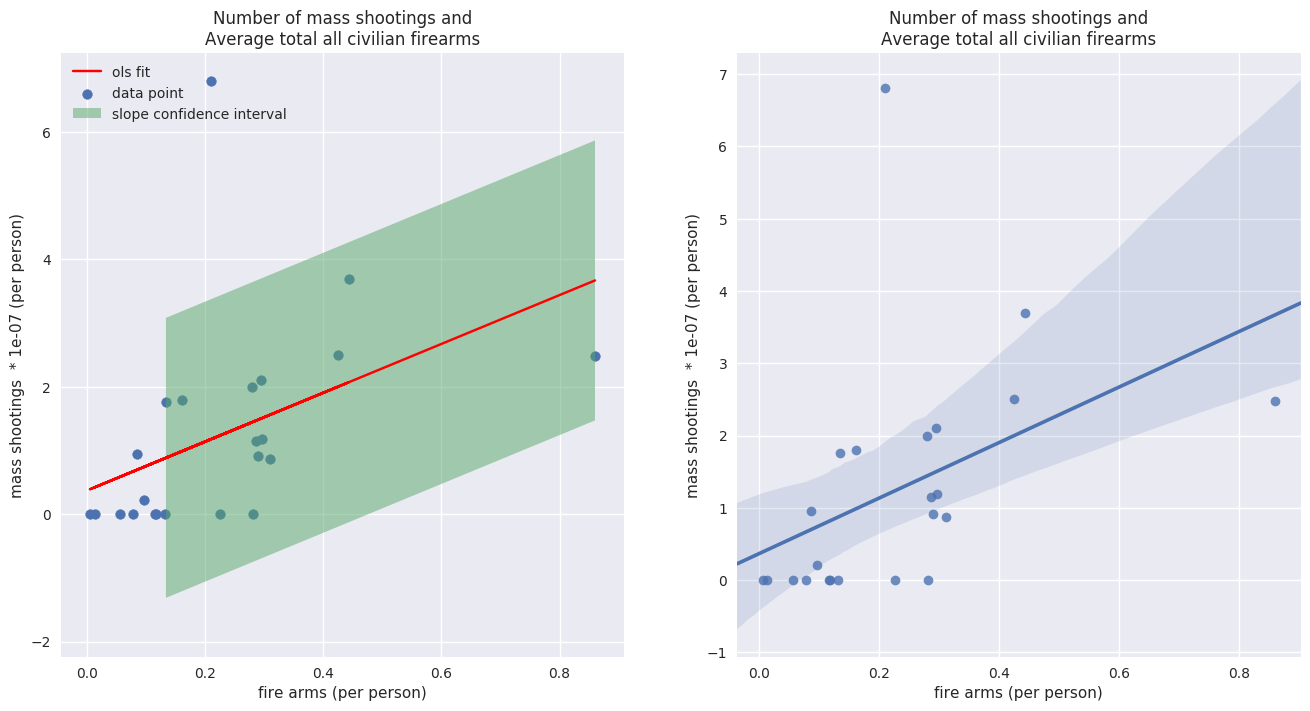

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16,8), dpi=100)

# ols fitted values with confidence interval
ax[0].scatter(df['fapp'], df['masspp'], label='data point')
ax[0].plot(x, sm_ols.fittedvalues, 'r', label='ols fit')
ax[0].set_xlabel('fire arms (per person)')
ax[0].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[0].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[0].fill_between(x, sm_ols.fittedvalues - ci, sm_ols.fittedvalues + ci, alpha=0.5, label='slope confidence interval')
ax[0].legend(loc=2)

# using sns
sns.regplot(x, y, data=df, ax=ax[1])
ax[1].set_xlabel('fire arms (per person)')
ax[1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1].legend(loc=2)

** the confidence intervals produced by the two different methods are not same. the sns plot tends to show a better representation of the confidence interval. the latter shows a large interval at the last observed data point which is the United States confirming the idea of high uncertainty around the predictions done at the second half zone of the model.**

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


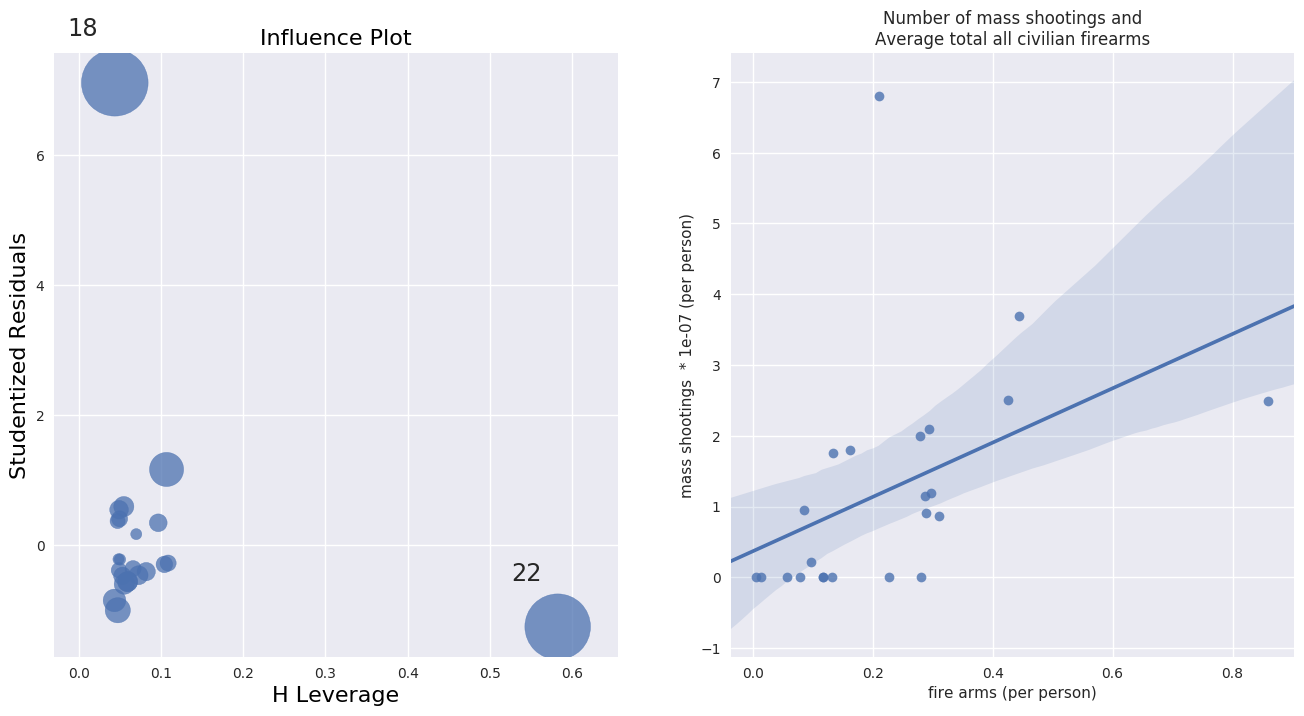

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16,8), dpi=100)

sm.graphics.influence_plot(sm_ols, alpha  = 0.05, criterion="cooks", ax=ax[0]);

# using sns
ax[1].sns_reg = sns.regplot(x, y, data=df)
ax[1].set_xlabel('fire arms (per person)')
ax[1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1].legend(loc=2)

** A plot of residuals as a function of leverage identifies influential observations that are not modeled well by the regression. These quantities are shown here for the fit results of the ols model. The criterion is set to 'Cooks', and size of the points represent cooks distance. The 18th observation (New Zealand) stands out as a low-leverage outlier with a large residual and a large Cook’s distance. In contrast, the 22th observation (United States) has high leverage, a large residual and a large Cook’s distance. It is good to note that observations near the mean have less influence on the regression estimates and fitted values. **

In [33]:
df['Country Name'][18]

'New Zealand'

In [34]:
df['Country Name'][22]

'United States'